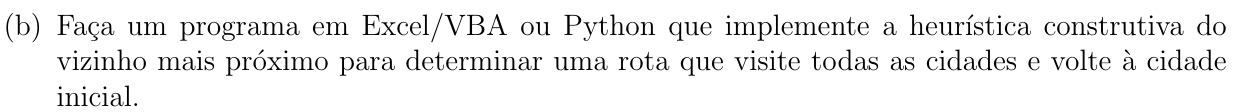

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/2b.png')

In [34]:
# Bibliotecas
import xlwings as xw
import pandas as pd

In [35]:
# Planilha
wb = xw.Book('dados_1.xlsx')
sheet = wb.sheets['Plan2']

# Dados
Cidades = [int(c) for c in sheet.range('C2:K2').value]
distancias = sheet.range('B2:K11').options(pd.DataFrame).value.stack().to_dict()

In [36]:
def proxima_cidade(i, lista_cidades, distancias, rota):
    cont = 0
    for c in lista_cidades:
        if c not in rota:
            if cont == 0:
                a = c
                j = c
            elif distancias[i, c] <= distancias[i, a]:
                a = c
                j = c
            cont += 1
    return j  # j é a cidade mais próxima de i

In [37]:
# 1. Inicializa a rota na primeira cidade
rota = [3]
# 2. Inicializa contador de distâncias
d = 0

In [38]:
while sum(rota) != sum(Cidades):
    # 3. i recebe o último nó da rota
    i = rota[-1]
    # 4. j recebe o nó mais próximo a i que não foi visitado
    j = proxima_cidade(i, Cidades, distancias, rota)
    # 5. Adiciona j à rota
    rota.append(j)
    # 6. Atualiza a distância
    d += distancias[rota[-2], rota[-1]]
    # 7. Loop ocorre enquanto todos os nós não forem visitados

In [39]:
# 8. Adiciona o primeiro nó à rota
rota.append(rota[0])
# 9. Cálculo final da distância
d += distancias[rota[-2], rota[-1]]

In [40]:
rota

[3, 2, 1, 6, 7, 9, 4, 8, 5, 3]

In [41]:
d

1565.4